In [129]:
import methods
import dgp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap
import importlib
import os
os.chdir('/Users/harshparikh/Documents/GitHub/credence-to-causal-estimation/credence-v2/src/')
import credence
import autoencoder
importlib.reload(autoencoder)
importlib.reload(credence)
importlib.reload(methods)
importlib.reload(dgp)
os.chdir('/Users/harshparikh/Documents/GitHub/credence-to-causal-estimation/credence-v2/notebooks/')
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid",font_scale=1.5)

In [130]:
df_1, df_true_1 = dgp.dgp1()

df_2, df_true_2 = dgp.dgp2()

df_exp_lalonde, df_obs_lalonde = dgp.lalonde()

df_exp_star, df_obs_star = dgp.project_star()

In [ ]:
ate_1 = methods.bootstrap_ate_inference(outcome='Y',treatment='T',data=df_1,repeats=50)
bias_1 = ate_1 - df_true_1['TE'].mean()

ate_2 = methods.bootstrap_ate_inference(outcome='Y',treatment='T',data=df_2,repeats=50)
bias_2 = ate_2 - df_true_2['TE'].mean()

ate_exp_lalonde = df_exp_lalonde.loc[df_exp_lalonde['treat']==1,'re78'].mean() - df_exp_lalonde.loc[df_exp_lalonde['treat']==0,'re78'].mean()
ate_lalonde = methods.bootstrap_ate_inference(outcome='re78',treatment='treat',data=df_obs_lalonde,repeats=50)
bias_lalonde = ate_lalonde - ate_exp_lalonde

ate_exp_star = df_exp_star.loc[df_exp_star['g3smallclass']==1,'g3avgscore'].mean() - df_exp_star.loc[df_exp_star['g3smallclass']==0,'g3avgscore'].mean()
ate_star = methods.bootstrap_ate_inference(outcome='g3avgscore',treatment='g3smallclass',data=df_obs_star,repeats=50)
bias_star = ate_star - ate_exp_star

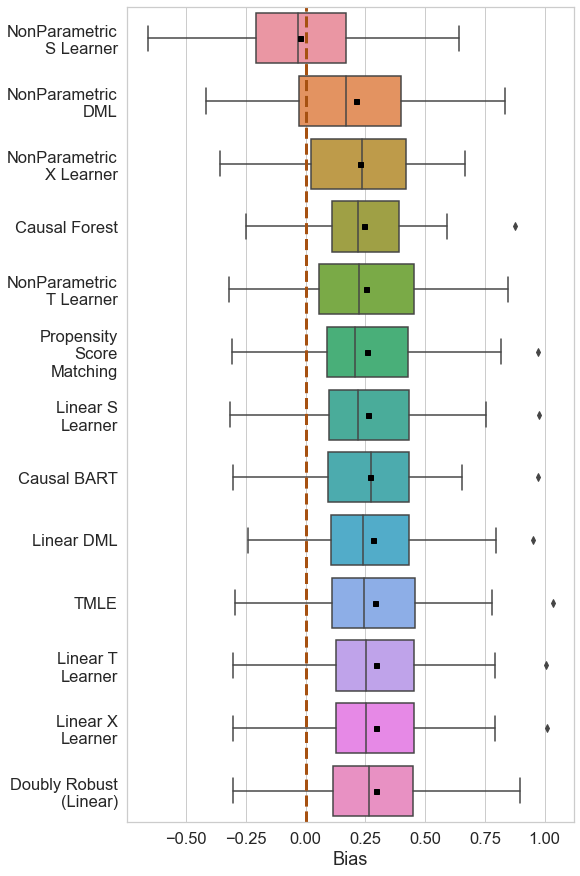

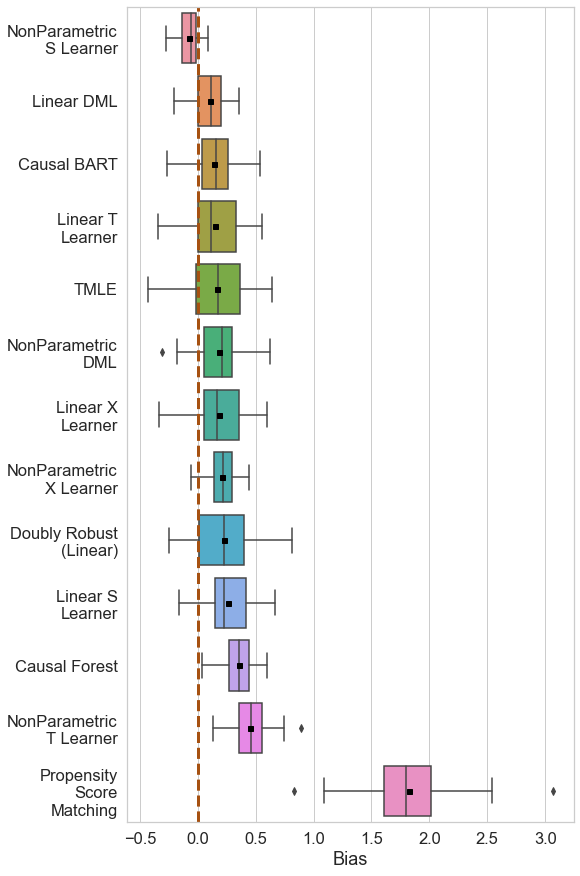

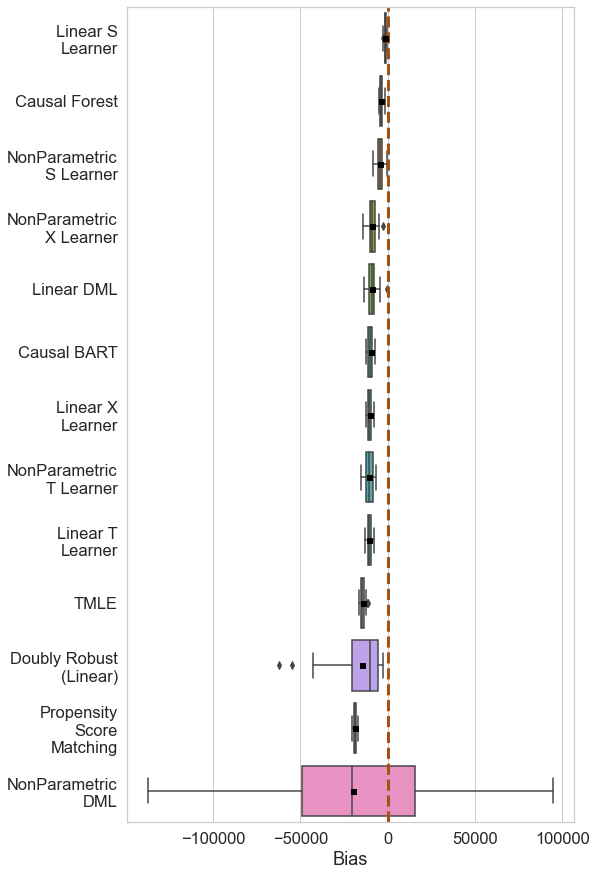

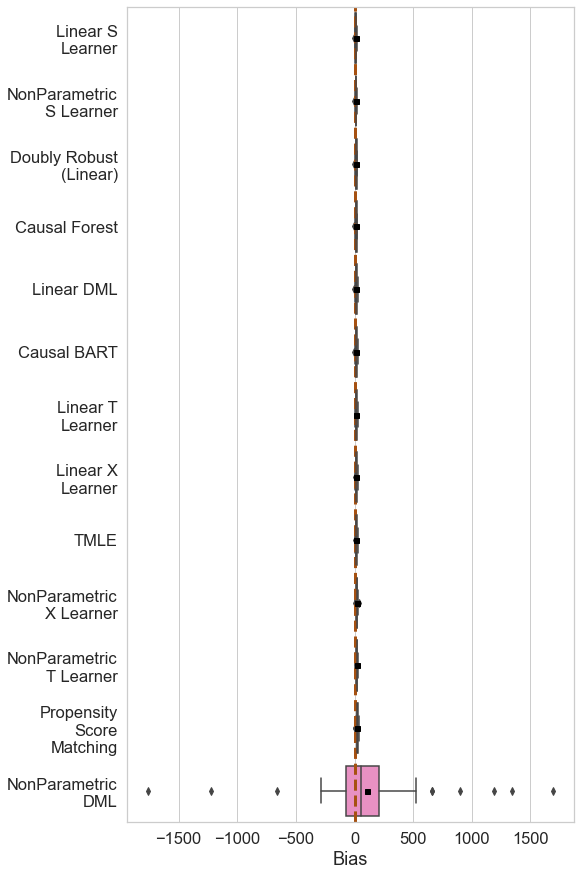

In [123]:
order = list(np.abs(bias_1.mean(axis=0)).sort_values().index)
fig = plt.figure(figsize=(8,15))
sns.boxplot(data=bias_1[order],orient='h',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
# sns.swarmplot(data=bias_1[order],orient='h',color='black')
plt.yticks(np.arange(0,len(order)),[textwrap.fill(e, 13) for e in order])
plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('Bias')
plt.savefig('Figures/dgp1_bias_true.png')


order = list(np.abs(bias_2.mean(axis=0)).sort_values().index)
fig = plt.figure(figsize=(8,15))
sns.boxplot(data=bias_2[order],orient='h',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
# sns.swarmplot(data=bias_2[order],orient='h',color='black')
plt.yticks(np.arange(0,len(order)),[textwrap.fill(e, 13) for e in order])
plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('Bias')
plt.savefig('Figures/dgp2_bias_true.png')

order = list(np.abs(bias_lalonde.mean(axis=0)).sort_values().index)
fig = plt.figure(figsize=(8,15))
sns.boxplot(data=bias_lalonde[order],orient='h',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
# sns.swarmplot(data=bias_2[order],orient='h',color='black')
plt.yticks(np.arange(0,len(order)),[textwrap.fill(e, 13) for e in order])
plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('Bias')
plt.savefig('Figures/lalonde_bias_wrt_exp.png')

order = list(np.abs(bias_star.mean(axis=0)).sort_values().index)
fig = plt.figure(figsize=(8,15))
sns.boxplot(data=bias_star[order],orient='h',showmeans=True,
            meanprops={"marker":"s",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"5"})
# sns.swarmplot(data=bias_2[order],orient='h',color='black')
plt.yticks(np.arange(0,len(order)),[textwrap.fill(e, 13) for e in order])
plt.axvline(0,c='#a65111',ls='--',lw=3)
plt.xlabel('Bias')
plt.savefig('Figures/star_bias_wrt_exp.png')

pd.concat([bias_1.mean(axis=0),bias_1.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/dgp1_bias_true.tex')
pd.concat([bias_2.mean(axis=0),bias_2.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/dgp2_bias_true.tex')
pd.concat([bias_lalonde.mean(axis=0),bias_lalonde.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/lalonde_bias_wrt_exp.tex')
pd.concat([bias_star.mean(axis=0),bias_star.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/star_bias_wrt_exp.tex')

pd.concat([ate_1.mean(axis=0),ate_1.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/dgp1_ate_true.tex')
pd.concat([ate_2.mean(axis=0),ate_2.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/dgp2_ate_true.tex')
pd.concat([ate_lalonde.mean(axis=0),ate_lalonde.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/lalonde_ate_wrt_exp.tex')
pd.concat([ate_star.mean(axis=0),ate_star.std(axis=0)],axis=1).rename(columns={0:'mean',1:'stdev'}).to_latex('Figures/star_ate_wrt_exp.tex')

# Validation Using Credence

In [124]:
v_1 = credence.Credence(data=df_1, # dataframe 
                      post_treatment_var=['Y'], # list of post treatment variables
                      treatment_var=['T'], # list of treatment variable(s)
                      categorical_var=['T'], # list of variables which are categorical
                      numerical_var=list(df_1.drop(columns=['T']).columns) # list of variables which are numerical
                     )

NameError: name 'credence' is not defined